# Kaggle Study Day 22

# How Autoencoders Work : Intro and UseCases 

https://www.kaggle.com/shivamb/how-autoencoders-work-intro-and-usecases

# 1. Introduction

## 1.1. What are Autoencoders

Autoencoder는 출력이 입력과 동일한 특수한 유형의 인공신경망 구조다. Autoencoder는 입력 데이터의 아주 낮은 수준의 표현을 학습하기 위해 비지도방식으로 학습된다. 그런 다음 이러한 낮은 수준의 변수는 실제 데이터를 투영하기 위해 다시 변형된다. Autoencoder는 네트워크망을 통해 입력을 에측하는 회귀 작업이다(즉, identity 함수 모델링). 이런 네트워크망은 중간에 몇 뉴런의 병목현상이 있어, 디코더가 원래 입력을 재현하는 데 사용할 수 있는 저차원의 코드로 입력을 압축하는 효과적인 표현을 만들어야한다. 

일반적인 autoencoder 구조는 다음과 같은 세가지 주요 요소로 구성된다.
- Encoding Architecture : 인코더 구조는 노드 수가 감소하는 일련의 레이어로 구성되며 궁극적으로 latent view representation으로 감소한다.
- Latent View Representation : 잠재 뷰(latent view)는 입력이 감소하고 정보가 보존되는 가장 낮은 수준의 공간을 나타낸다.
- Decoding Architecture : 디코딩 구조는 인코딩 구조의 거울 이미지이지만, 모든 레이어의 노드 수가 증가하고 궁극적으로 (거의) 유사한 입력을 출력한다.

아주 미세하게 튜닝된 autoencoder 모델은 첫 레이어에서 전달된 동일한 입력을 재구성할 수 있어야한다. 이 커널에서 autoencoder 작업과 구현을 안내할 것이다. autoencoder는 이미지 데이터와 널리 사용되며 사용 예시는 다음과 같다.
- 차원 축소
- 이미지 압축
- 이미지 노이즈 제거
- 이미지 생성
- 변수 추출

## 1.2. How Autoencoders work

autoencoder에 숨겨진 수학을 이해해보자. autoencoder에 숨겨진 주요 아이디어는 고차원 데이터의 저차원 표현을 학습하는 것이다. 예시와 함께 인코딩 과정을 이해해보자. 데이터 표현 공간(데이터를 표현하는 데 사용되는 N 차원 공간)을 고려하고, x1과 x2 두 변수로 표현되는 데이터 포인트를 고려한다. 데이터 manifold는 실제 데이터가 있는 데이터 표현 공간의 내부 공간이다.

-- 내 설명 - 시온 -- <br>
Manifold란 고차원 데이터(예: (256, 256, 3) 크기의 이미지)가 있을 때 고차원 데이터를 데이터 공간에 뿌리면 sample들을 잘 아우르는 subspace가 있을 것이라는 가정에서 학습을 진행하는 방법. 이렇게 찾은 manifold는 데이터의 차원을 축소시킬 수 있다.

In [14]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import numpy as np
init_notebook_mode(connected=True)

# 랜덤 데이터 생성
N = 50
random_x = np.linspace(2,10,N)  ### linspace(start, stop, num)
random_y1 = np.linspace(2,10,N) ### start부터 stop까지 num개의 수열 생성
random_y2 = np.linspace(2,10,N)

trace1 = go.Scatter(x=random_x, y=random_y1, mode='markers', name='Actual Data')
trace2 = go.Scatter(x=random_x, y=random_y2, mode='lines', name='Model')
layout = go.Layout(title='2D Data Representation Space', xaxis=dict(title='x2', range=(0,12)), yaxis=dict(title='x1', range=(0,12)), height=400,
                  annotations=[dict(x=5,y=5,xref='x',yref='y',text='This 1D line is the Data Maniffold (where data resides)',
                                   showarrow=True, align='center', arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor='#636363',
                                   ax=-120, ay=-30, bordercolor='#c7c7c7', borderwidth=2, borderpad=4, bgcolor='orange', opacity=0.8)])
figure = go.Figure(data=[trace1], layout=layout)
iplot(figure)

이 데이터를 표현하기 위해 현재 X와 Y의 2차원을 사용하고 있다. 하지만 이 공간의 차원을 저차원(1D)으로 줄이는 게 가능하다.
- 선의 기준점 : A
- 수평축을 가진 각도 L

위의 두가지를 정의할 수 있으면, 선 A 위의 다른 점(B)은 A부터의 거리 'd'와 각도 L로 나타낼 수 있다.

In [16]:
random_y3 = [2 for i in range(100)]  # 100개의 2가 있는 리스트
random_y4 = random_y2 + 1
trace4 = go.Scatter(x=random_x[4:24], y=random_y4[4:300], mode='lines')
trace3 = go.Scatter(x=random_x, y=random_y3, mode='lines')
trace1 = go.Scatter(x=random_x, y=random_y1, mode='markers')
trace2 = go.Scatter(x=random_x, y=random_y2, mode='lines')

layout = go.Layout(xaxis=dict(title="x1", range=(0,12)), yaxis=dict(title="x2", range=(0,12)), height=400,
                   annotations=[dict(x=2, y=2, xref='x', yref='y', text='A', showarrow=True, align='center', arrowhead=2, arrowsize=1, arrowwidth=2, 
                                     arrowcolor='#636363', ax=20, ay=-30, bordercolor='#c7c7c7', borderwidth=2, borderpad=4, bgcolor='orange', opacity=0.8), 
                                dict(x=6, y=6, xref='x', yref='y', text='B', showarrow=True, align='center', arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor='#636363',
                                     ax=20, ay=-30, bordercolor='#c7c7c7', borderwidth=2, borderpad=4, bgcolor='yellow', opacity=0.8), dict(
                                     x=4, y=5, xref='x', yref='y',text='d', ay=-40), 
                                dict(x=2, y=2, xref='x', yref='y', text='angle L', ax=80, ay=-10)], title="2D Data Repersentation Space", showlegend=False)
data = [trace1, trace2, trace3, trace4]
figure = go.Figure(data=data, layout=layout)
iplot(figure)


###################

random_y3 = [2 for i in range(100)]
random_y4 = random_y2 + 1
trace4 = go.Scatter(x = random_x[4:24], y = random_y4[4:300], mode="lines")
trace3 = go.Scatter(x = random_x, y = random_y3, mode="lines")
trace1 = go.Scatter(x = random_x, y = random_y1, mode="markers")
trace2 = go.Scatter(x = random_x, y = random_y2, mode="lines")
layout = go.Layout(xaxis=dict(title="u1", range=(1.5,12)), yaxis=dict(title="u2", range=(1.5,12)), height=400,
                   annotations=[dict(x=2, y=2, xref='x', yref='y', text='A', showarrow=True, align='center', arrowhead=2, arrowsize=1, arrowwidth=2, 
                                     arrowcolor='#636363', ax=20, ay=-30, bordercolor='#c7c7c7', borderwidth=2, borderpad=4, bgcolor='orange', opacity=0.8), 
                                dict(x=6, y=6, xref='x', yref='y', text='B', showarrow=True, align='center', arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor='#636363',
                                     ax=20, ay=-30, bordercolor='#c7c7c7', borderwidth=2, borderpad=4, bgcolor='yellow', opacity=0.8), dict(
                                     x=4, y=5, xref='x', yref='y',text='d', ay=-40), 
                                dict(x=2, y=2, xref='x', yref='y', text='angle L', ax=80, ay=-10)], title="Latent Distance View Space", showlegend=False)
data = [trace1, trace2, trace3, trace4]
figure = go.Figure(data = data, layout = layout)
iplot(figure)

하지만 여기서 중요한 질문은 어떤 로직이나 규칙으로 점 B가 A와 각도 L의 조건에서 표현될 수 있냐는 것이다. 혹은 다른 말로, B, A, L의 방정식은 무엇인가이다. 답은 간단하다. 고정된 방정식은 없지만 비지도학습 과정에 의해 최적의 방정식이 얻어진다. 간단히 말하면, 학습 과정은 B를 A와 L의 형태로 변환하는 규칙/방정식으로 정의될 수 있다. autoencoder의 관점에서 이 과정을 이해해보자.

은닉층이 없는 autoencoder를 고려해보자. 입력 x1와 x2는 나중에 x1과 x2로 투영되는 저차원 표현 d로 인코딩된다.

### Step1 : Represent the points in Latent View Space

데이터 표현 공간에서 점 A와 B의 좌표가 
- point A : (x1A, x2B)
- point B : (x1B, x2B)

라면, latent view space에서 이들의 좌표는 다음과 같다. <br>
(x1A, x2A) ---> (0, 0) <br>
(x1B, x2B) ---> (u1B, u2B)
- point A : (0,0)
- point B : (u1B, u2B)

여기서 u1B와 u2B는 점과 기준점 사이의 거리 형태로 표현될 수 있다.<br>
u1B = x1B - x1A <br>
u2B = x2B - x2A

### Step 2: Represent the points with distance d and angle L

이제 u1B와 u2B는 거리 d와 각도 L의 조합으로 표현될 수 있다. 이것을 각도 L, 수평축으로 돌리면, L은 0, 즉, 아래와 같다.<br>
=> (d, L) <br>
=> (d, 0) (after rotation)

이것은 인코딩 과정의 출력이며 저차원으로 데이터를 나타낸다. 모든 레이어의 가중치와 편향(bias)를 가진 신경망의 기본 방정식을 recall한다면, 다음과 같다. <br>
=> (d, 0) = W.(u1B, u2B)
==> (encoding)

W는 은닉층의 가중치행렬이다. 이로 인해 디코딩 과정이 인코딩 과정의 거울이미지라는 것을 알 수 있다. <br>
=> (u1B, u2B) = Inverse(W).(d, 0) <br>
==> (decoding)

데이터 (x1, x2)의 축소된 형태는 인코딩 구조에서 얻은 latent view space의 (d, 0)이다. 마찬가지로, 디코딩 구조는 이 표현을 원래 형식 (u1B, u2B)로 변환한 다음 (x1, x2)로 변환한다. 중요한 점은 규칙 / 학습 함수 / 인코딩-디코딩 방정식이 다양한 데이터타입에 따라 다르다는 것이다. 예를 들어, 2차원 공간에서 다음 데이터를 고려해보자.

#### Different Rules for Different Data

모든 데이터타입에 동일한 규칙을 적용할 수 없다. 예를 들어, 위의 예제에서 선형 데이터 매니폴드를 한 차원에 투영하고 각도 L을 제거했다. 하지만 데이터 매니폴드가 제대로 투영되지 않는다면. 예를 들어 다음 데이터 매니폴드 보기를 고려해보자.

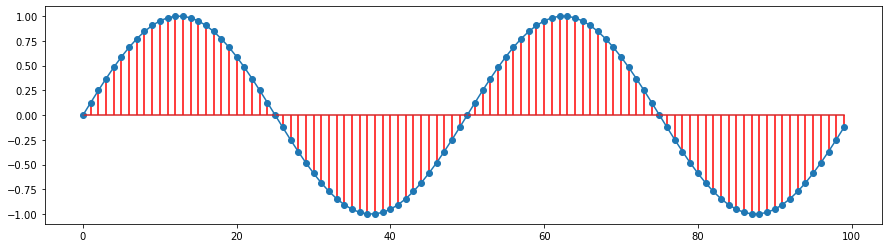

In [17]:
import matplotlib.pyplot as plt
import numpy as np
fs = 100  # 표본 비율
f = 2  # 신호 빈도
x = np.arange(fs)  # plotting을 위한 x축 위의 점
y = [np.sin(2*np.pi*f*(i/fs)) for i in x]

%matplotlib inline
plt.figure(figsize=(15,4))
plt.stem(x,y,'r',)
plt.plot(x,y)

이런 데이터타입에서, 핵심적인 문제는 정보를 잃지 않고 단일 차원으로 데이터의 투영을 얻는 것이다. 이런 데이터타입이 latent space에서 투영되면, 많은 정보가 손실되고 원래 모양으로 투영하는 것은 거의 불가능하다. shift와 rotation이 아무리 많이 적용되어도 원본 데이터는 복구할 수 없다.

그렇다면 신경망은 이 문제를 어떻게 해결할까? 의도는, 매니폴드 공간에서, 심층신경망이 linear data fold view를 얻기 위해 공간을 구부리는 속성을 가지고 있는 것이다. autoencoder 구조는 latent view space에서 저차원 표현을 학습할 수 있게 이 속성을 은닉층에 적용한다. (참고 이미지는 맨 위 링크에서 찾아볼 것. 이해에 도움됨)

먼저 이미지에서 변수를 학습한 keras를 사용해 autoencoder를 실행하고, 출력과 동일한 이미지를 투사해보자.

# 2. Implementation

## 2.1. UseCase 1: Image Reconstruction

### 2.1.1. Load the required libraries

In [19]:
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPooling2D, UpSampling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
from keras.models import Model
from imgaug import augmenters
from random import randint
import pandas as pd
import numpy as np